In [1]:
# Standard library imports
import logging
import json
import importlib
import numpy as np
import matplotlib.pyplot as plt

# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

# --- Configuration ---
# Set up basic logging to see pipeline output in the notebook
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Define the path to the configuration file for the analysis run
BURST_CONFIG_PATH = '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/configs/bursts/freya.yaml'


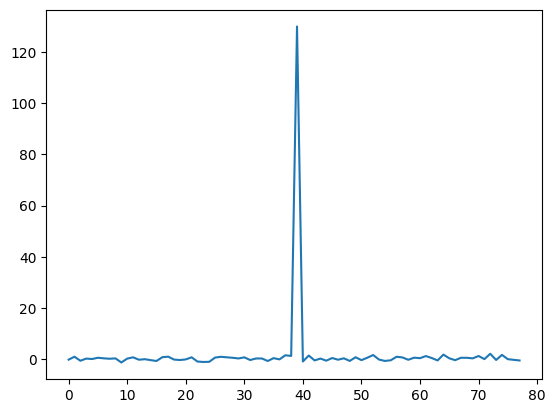

In [2]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

wilhelm = np.load('/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/data/wilhelm_dsa_I_602_346_2500b_cntr_bpc.npy')
downsample_factor = 32
prof = np.nansum(wilhelm,axis=0)
n = prof.size - (prof.size % downsample_factor)
prof = prof[:n].reshape(-1, downsample_factor).mean(axis=1)
    
plt.plot(prof)
#plt.xlim(1216, 1347)
plt.show()
                    

In [3]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

# Load the merged configuration from the YAML files
try:
    analysis_config = config.load_config(BURST_CONFIG_PATH)
    # Pretty-print the configuration to verify it
    print("--- Loaded Configuration ---")
    print(json.dumps(analysis_config, indent=2))
except Exception as e:
    logging.error(f"Failed to load configuration: {e}")


INFO: Loading burst configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/configs/bursts/freya.yaml
INFO: Loading telescope configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/configs/bursts/../telescopes/dsa.yaml
INFO: Configurations successfully loaded and merged.


--- Loaded Configuration ---
{
  "telescope_name": "DSA-110",
  "instrument_type": "Multi-Dish Interferometer",
  "native_channel_width_mhz": 0.03051757812,
  "total_bandwidth_mhz": 187.5,
  "num_channels": 6144,
  "min_freq_mhz": 1311.25,
  "max_freq_mhz": 1498.75,
  "burst_id": "freya",
  "input_data_path": "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/data/freya.npz",
  "telescope": "dsa",
  "analysis": {
    "rfi_masking": {
      "find_burst_thres": 5.0,
      "use_symmetric_noise_window": true,
      "rfi_downsample_factor": 16,
      "enable_time_domain_flagging": false,
      "time_threshold_sigma": 7.0,
      "freq_threshold_sigma": 5.0
    },
    "acf": {
      "num_subbands": 4,
      "max_lag_mhz": 45.0,
      "use_snr_subbanding": true
    },
    "fitting": {
      "fit_lagrange_mhz": 45.0,
      "reference_frequency_mhz": 1400.0
    }
  },
  "pipeline_options": {
    "log_level": "INFO",
    "save_intermediate_step

INFO: Loading DynamicSpectrum from file: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/data/freya.npz
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Generating dynamic spectrum plot.


Raw spectrum loaded successfully.
<DynamicSpectrum (6144 channels x 2500 timesteps, 1311.2-1498.8 MHz)>

Displaying raw dynamic spectrum...


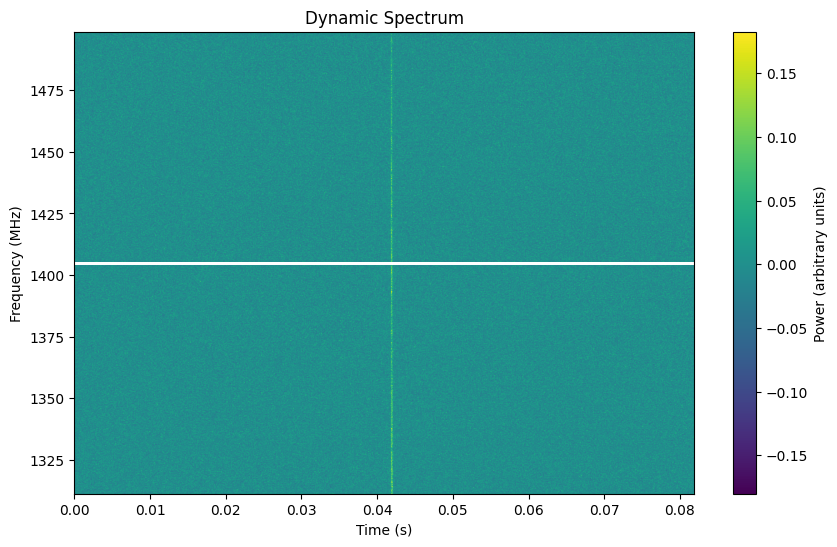

INFO: Applying RFI masking.
INFO: Using time downsampling factor of 16 for RFI statistical checks.
INFO: Efficiently finding burst envelope with S/N threshold > 5.0 (downsample ×8).



Applying RFI masking...
Mask: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  

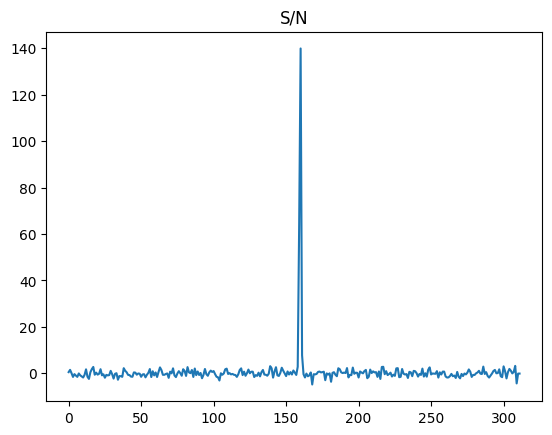

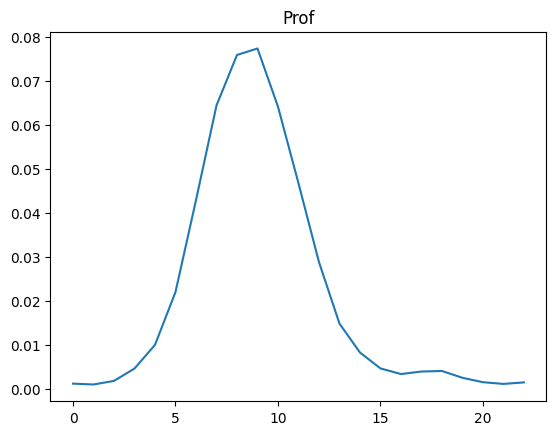

INFO: Burst envelope found between bins 1272 and 1295.
INFO: Using symmetric noise window of duration 23 bins.
INFO: Using downsampled noise statistics from bins 78 to 79.


Prof shape: (312,)
Peak S/N: 139.9403740470613


Iterative RFI Masking in Frequency Domain: 100%|██████████| 5/5 [00:00<00:00, 663.55it/s]
INFO: Masked 0 channels based on frequency-domain stats.
INFO: Skipping time-domain RFI flagging as per configuration.
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Generating dynamic spectrum plot.


RFI masking complete.

Displaying RFI-masked dynamic spectrum...


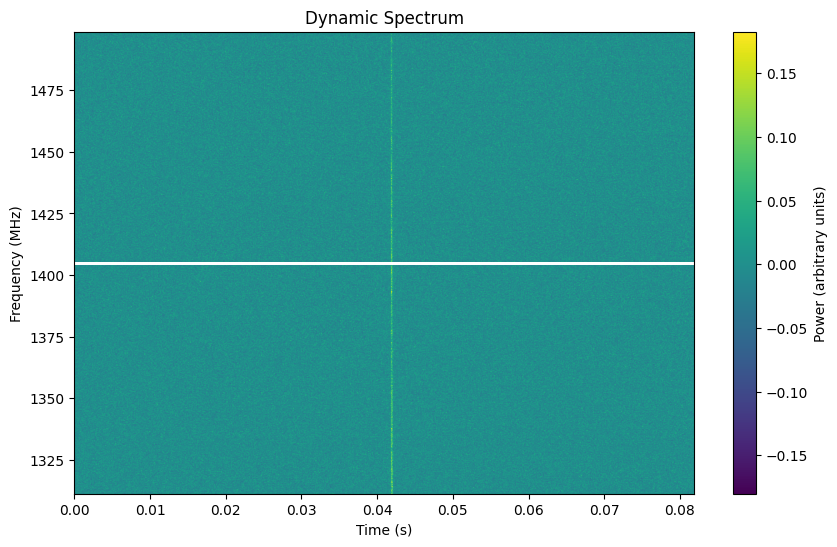

In [4]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting
importlib.reload(config)
importlib.reload(core)
importlib.reload(analysis)
importlib.reload(plotting)

# Load the dynamic spectrum from the path specified in the config
try:
    raw_spectrum = core.DynamicSpectrum.from_numpy_file(analysis_config['input_data_path'])
    print("Raw spectrum loaded successfully.")
    print(raw_spectrum)
except Exception as e:
    logging.error(f"Failed to load data: {e}")

# --- Visualization Step 1: Inspect Raw Data ---
if 'raw_spectrum' in locals():
    print("\nDisplaying raw dynamic spectrum...")
    plotting.plot_dynamic_spectrum(raw_spectrum)

# --- Perform RFI Masking ---
if 'raw_spectrum' in locals():
    print("\nApplying RFI masking...")
    masked_spectrum = raw_spectrum.mask_rfi(analysis_config)
    print("RFI masking complete.")

    # --- Visualization Step 2: Inspect Masked Data ---
    print("\nDisplaying RFI-masked dynamic spectrum...")
    plotting.plot_dynamic_spectrum(masked_spectrum)

INFO: Starting sub-band ACF calculations.
INFO: Efficiently finding burst envelope with S/N threshold > 5.0 (downsample ×8).



Calculating ACFs for all sub-bands (this may take a moment)...
Mask: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False

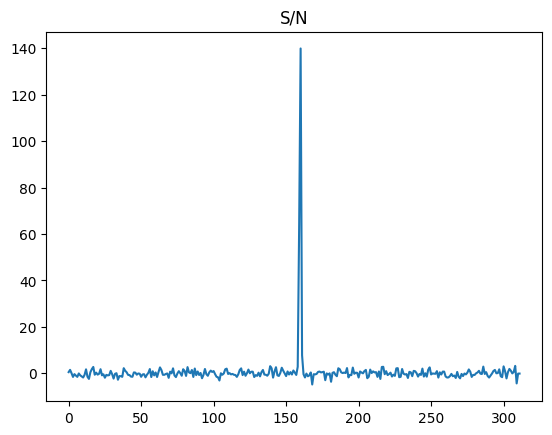

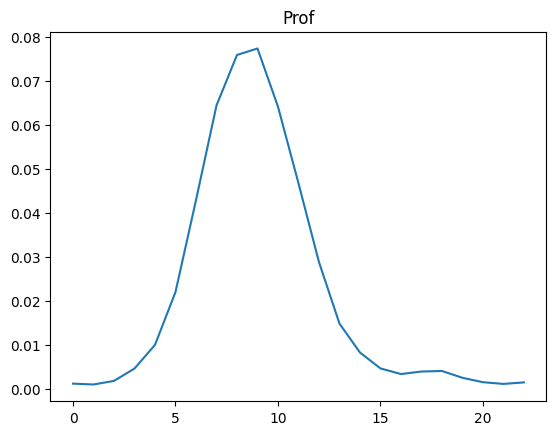

INFO: Burst envelope found between bins 1272 and 1295.


Prof shape: (312,)
Peak S/N: 139.9403740470613


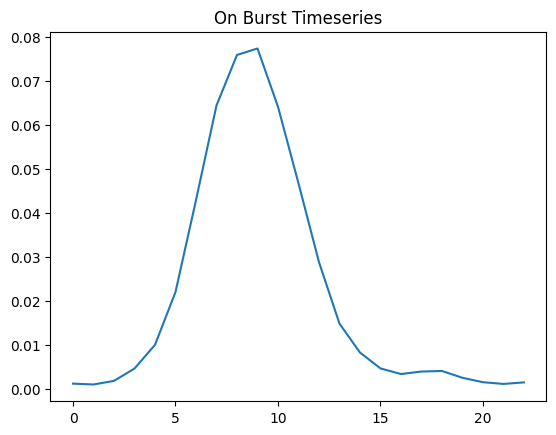

INFO: Using symmetric noise window of duration 23 bins.


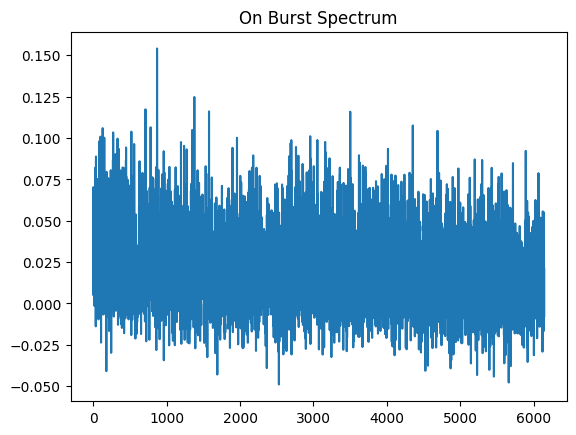

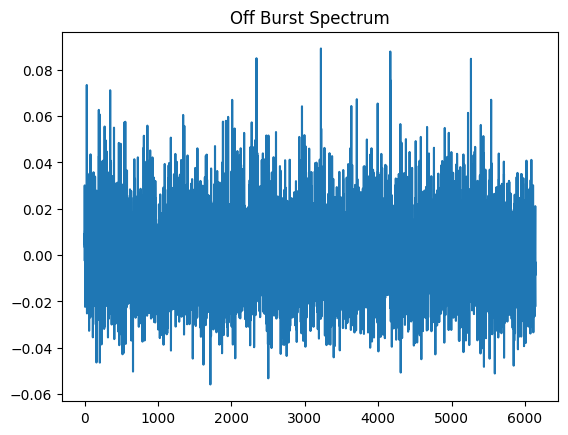

Calculating sub-band ACFs: 100%|██████████| 4/4 [00:00<00:00, 43.09it/s]

ACF calculation complete.

ACF Results Dictionary Keys: dict_keys(['subband_acfs', 'subband_lags_mhz', 'subband_center_freqs_mhz', 'subband_channel_widths_mhz', 'subband_num_channels'])
Computed ACFs for 4 sub-bands.


In [5]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

# --- Calculate ACFs for all sub-bands ---
if 'masked_spectrum' in locals():
    print("\nCalculating ACFs for all sub-bands (this may take a moment)...")
    acf_results = analysis.calculate_acfs_for_subbands(masked_spectrum, analysis_config)
    print("ACF calculation complete.")
    
    # You can inspect the structure of the results
    print("\nACF Results Dictionary Keys:", acf_results.keys())
    print(f"Computed ACFs for {len(acf_results['subband_acfs'])} sub-bands.")


In [6]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

# --- Run the final analysis and fitting stage ---
if 'acf_results' in locals() and acf_results['subband_acfs']:
    print("\nFitting models and deriving final scintillation parameters...")
    # This function returns both the final parameters and the raw lmfit objects
    final_results, all_subband_fits, powlaw_fit_params = analysis.analyze_scintillation_from_acfs(acf_results, analysis_config)
    print("Analysis complete.")

    # --- Inspect the Final Results ---
    print("\n--- Final Derived Parameters ---")
    print(json.dumps(final_results, indent=2))
else:
    logging.error("ACF results not available. Cannot proceed to final analysis.")


INFO: Fitting Lorentzian models to all sub-band ACFs...
/opt/pysetup/.venv/lib/python3.8/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")



Fitting models and deriving final scintillation parameters...


INFO: Model selection complete. Best overall model: 1 component(s).


α = 5.75,  A = 8.75e-17,  residual variance = 32471.574
Analysis complete.

--- Final Derived Parameters ---
{
  "best_model": 1,
  "components": {
    "scint_scale": {
      "power_law_fit_report": [
        8.747585362433685e-17,
        5.748962746311586
      ],
      "scaling_index": 5.748962746311586,
      "scaling_index_err": 15.970663416662845,
      "bw_at_ref_mhz": 106.87129241668623,
      "bw_at_ref_mhz_err": 104.3155580765384,
      "subband_measurements": [
        {
          "freq_mhz": 1328.800463942699,
          "bw": 0.036864939959591836,
          "mod": 0.349021861884538,
          "bw_err": 0.02481612777135182,
          "finite_err": 0.0005970933860018509
        },
        {
          "freq_mhz": 1369.9295946605891,
          "bw": 0.7364041795310373,
          "mod": 0.2061441797668937,
          "bw_err": 0.2154903865878207,
          "finite_err": 0.046026753717889266
        },
        {
          "freq_mhz": 1415.2097916327527,
          "bw": 330.4760088

INFO: Generating full analysis overview plot.



Generating final analysis overview plot...


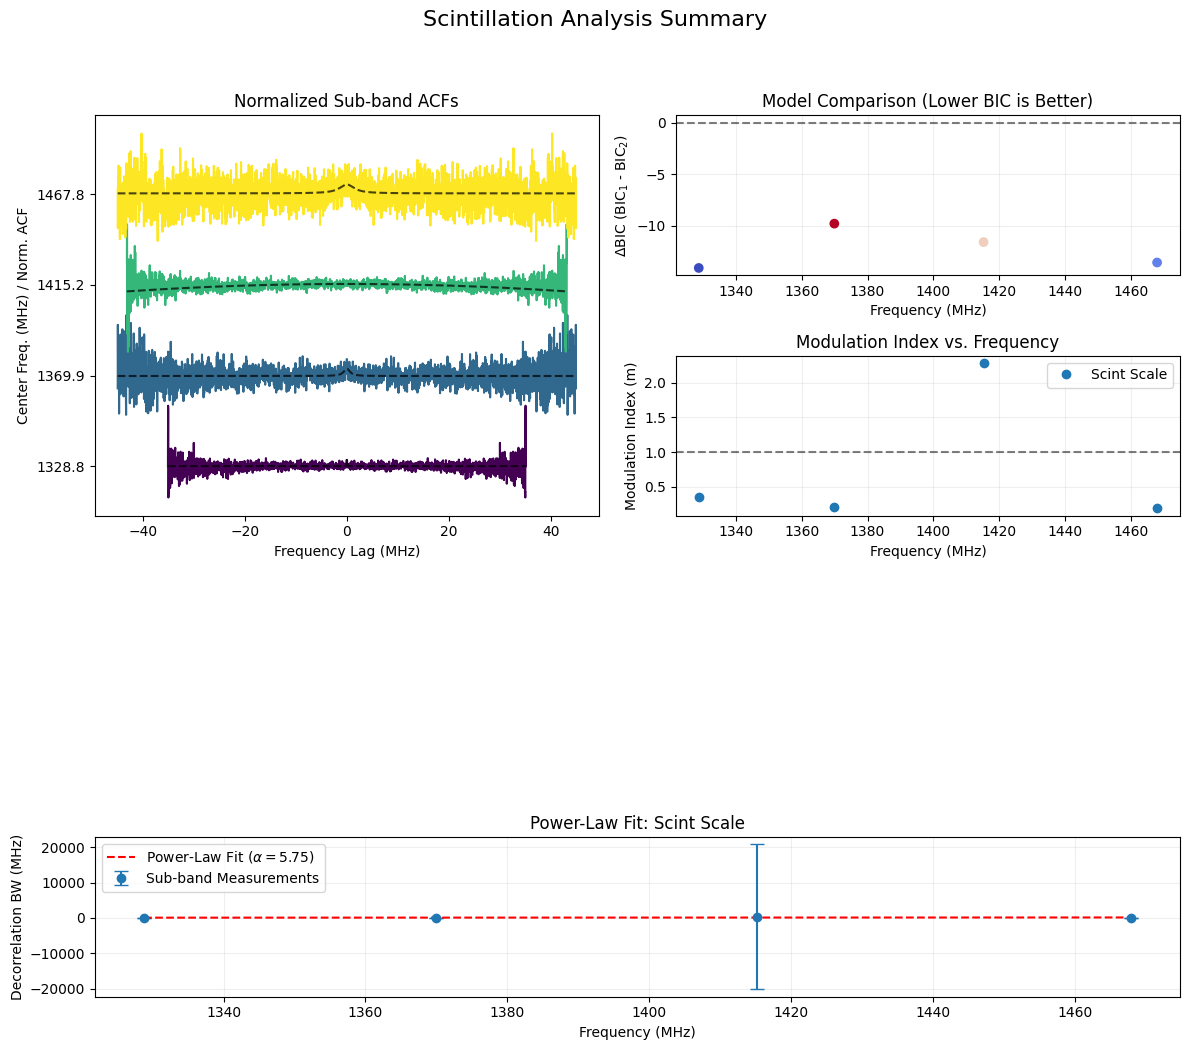

In [7]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting
importlib.reload(config)
importlib.reload(core)
importlib.reload(analysis)
importlib.reload(plotting)

# --- Generate the final overview plot ---
if 'final_results' in locals() and 'all_subband_fits' in locals():
    print("\nGenerating final analysis overview plot...")
    plotting.plot_analysis_overview(
        analysis_results=final_results,
        acf_results=acf_results,
        all_subband_fits=all_subband_fits,
        powlaw_fit_params=powlaw_fit_params
    )
else:
    logging.warning("Final results not available, skipping overview plot.")


In [8]:
def power_law_slope(freqs, bws):
    """
    Fit bws = A * freqs^alpha via a log–log linear regression.

    Parameters
    ----------
    freqs : array-like, shape (N,)
        Central frequencies (e.g. in MHz).
    bws : array-like, shape (N,)
        Measured decorrelation bandwidths (same units across all points).

    Returns
    -------
    alpha : float
        Power-law exponent (slope in log–log space).
    A : float
        Normalization constant (value of bws at freqs=1, in bws units).
    r2 : float
        Coefficient of determination of the log–log fit.
    """
    # Convert to NumPy arrays
    freqs = np.asarray(freqs)
    bws   = np.asarray(bws)

    # Take logs (base-10)
    logf = np.log10(freqs)
    logb = np.log10(bws)

    # Fit a line: logb = alpha * logf + logA
    alpha, logA = np.polyfit(logf, logb, 1)

    # Compute R^2 in log–log space
    logb_pred = alpha*logf + logA
    ss_res = np.sum((logb - logb_pred)**2)
    ss_tot = np.sum((logb - np.mean(logb))**2)
    r2     = 1 - ss_res/ss_tot

    # Convert normalization back from log
    A = 10**logA

    return alpha, A, r2

freqs = [1328.800463942699,1369.9295946605891, 1415.2097916327527, 1467.845922187856]
bws = [0.03686, 0.73640, 0.33048, 1.74117]

from scipy.odr import RealData, Model, ODR
import numpy as np

# Define power-law model: b = A * nu**alpha
def f(B, x):
    return B[0] * x**B[1]

model   = Model(f)
data    = RealData(freqs, bws)
odr     = ODR(data, model, beta0=[1e-8, 4.0])   # initial guess [A, alpha]
out     = odr.run()

A_fit, alpha_fit = out.beta
print(f"α = {alpha_fit:.2f},  A = {A_fit:.3g},  residual variance = {out.res_var:.3f}")

In [ ]:
freqs = [1328.800463942699,1369.9295946605891, 1415.2097916327527, 1467.845922187856]
bws = [0.03686, 0.73640, 0.33048, 1.74117]

from scipy.odr import RealData, Model, ODR
import numpy as np

# Define power-law model: b = A * nu**alpha
def f(B, x):
    return B[0] * x**B[1]

model   = Model(f)
data    = RealData(freqs, bws)
odr     = ODR(data, model, beta0=[1e-8, 4.0])   # initial guess [A, alpha]
out     = odr.run()

A_fit, alpha_fit = out.beta
print(f"α = {alpha_fit:.2f},  A = {A_fit:.3g},  residual variance = {out.res_var:.3f}")

In [ ]:
print(out.beta)